# Miguel Eduardo Castro Velasco
## Analisis de datos
## Dataset Regresión Logistica – Heart Disease Cleveland UCI
## Contiene información de pacientes.
(edad, sexo, presión, 
sanguínea, colesterol, etc. la variable objetivo es la presenci 
de enfermedad cardía).

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.a.c.

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5.Entrenar el modelo configurando los diferentes hiperparámetros.

6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8.Interpretar, analizar y documentar los resultados obtenidos.

## 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.a.c..

In [14]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Cargar el archivo CSV
data = pd.read_csv('heart_cleveland_upload.csv')

# Revisar las primeras filas para entender la estructura del dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


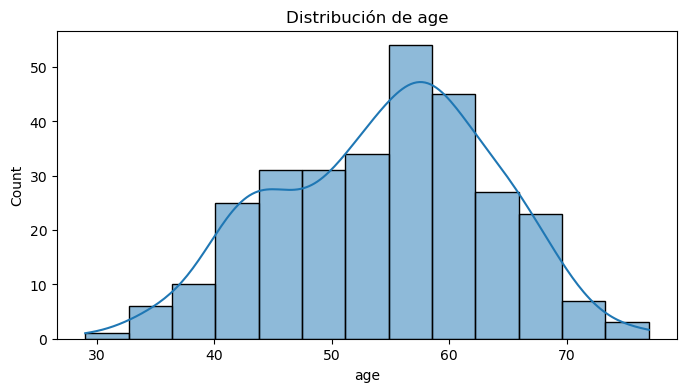

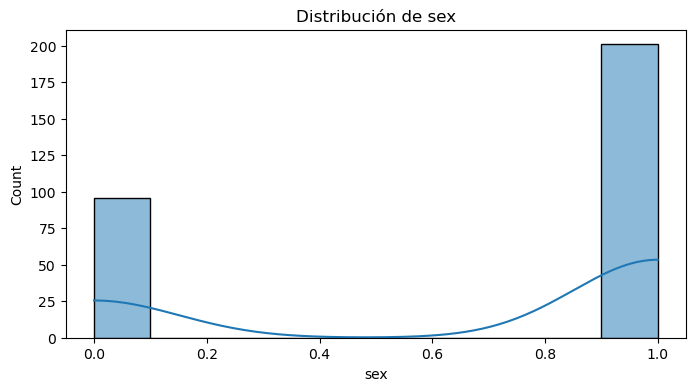

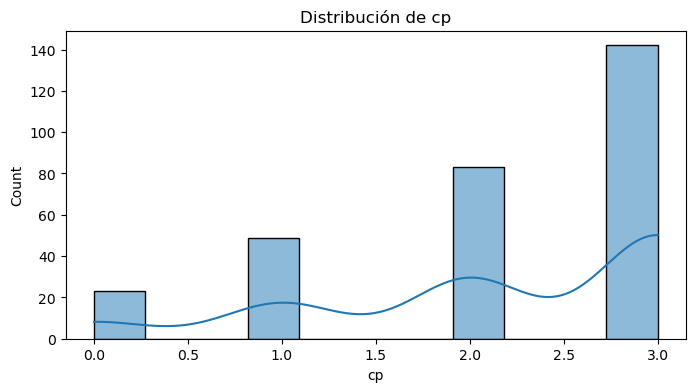

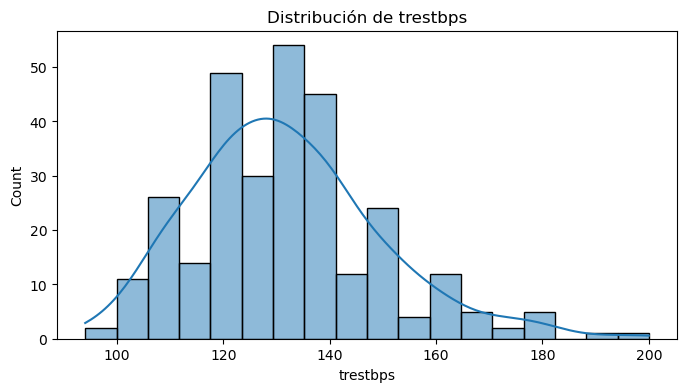

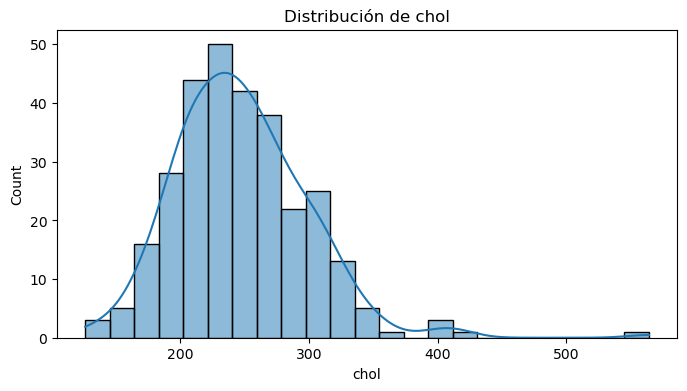

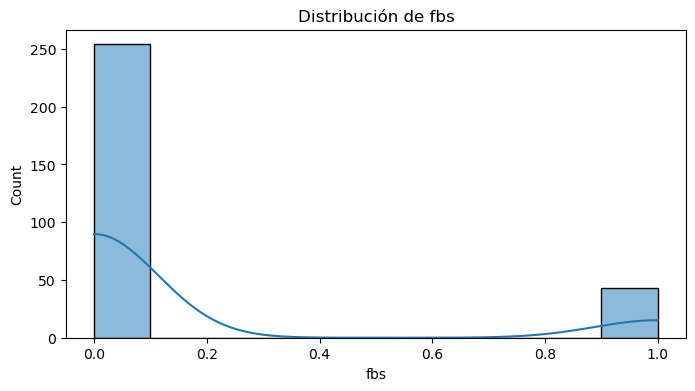

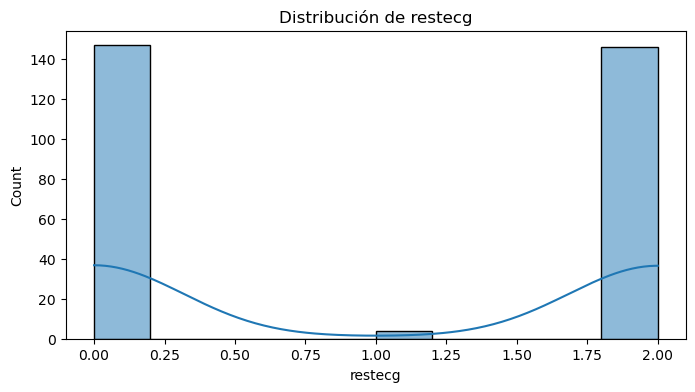

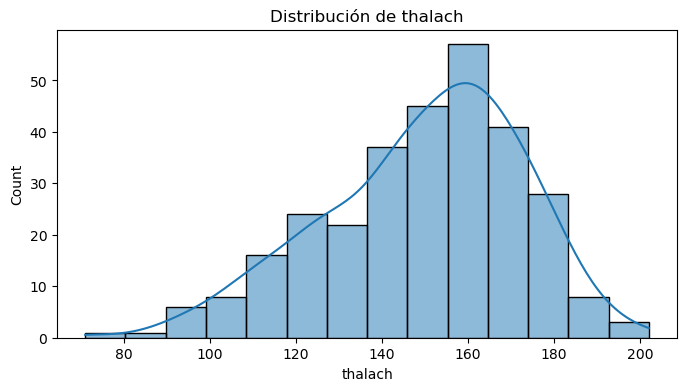

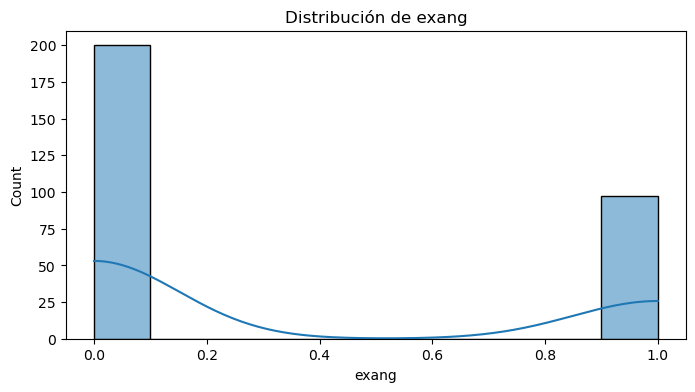

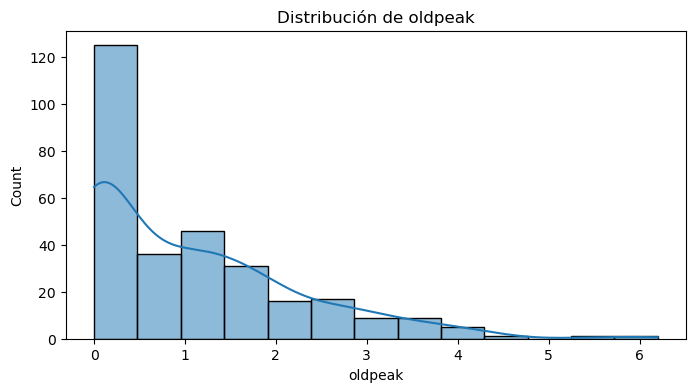

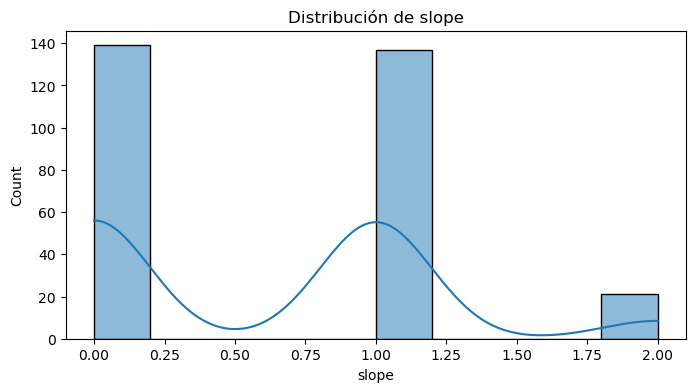

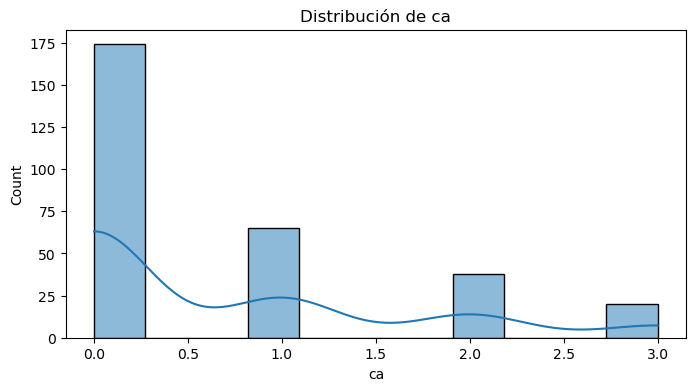

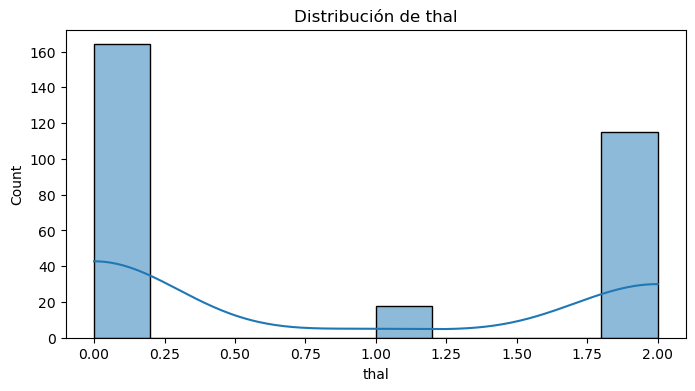

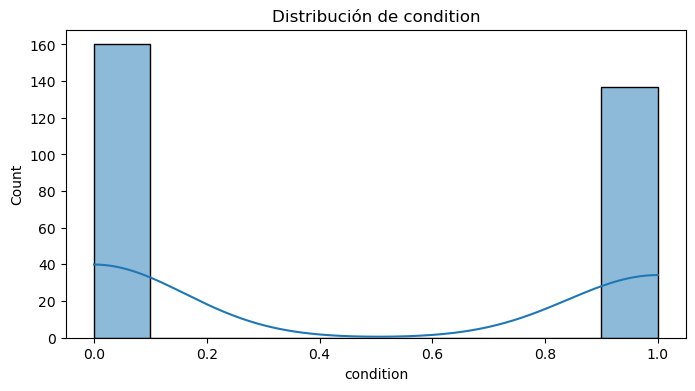

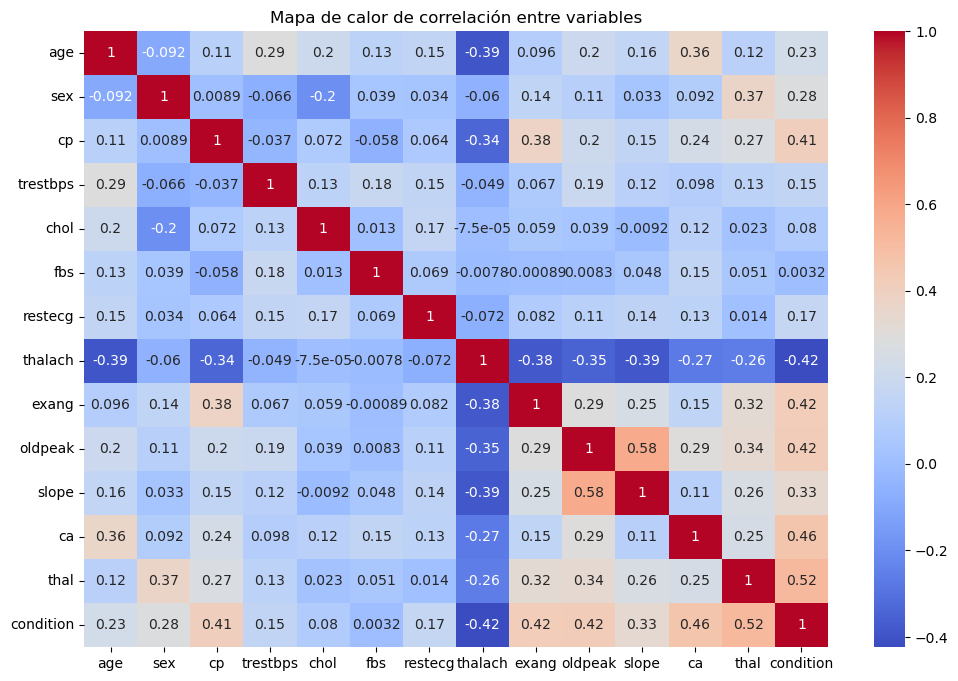

In [16]:
# Revisar información general del dataset
data.info()

# Revisar estadísticos descriptivos
data.describe()

# Revisar la distribución de las variables
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Identificar relaciones entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación entre variables")
plt.show()


## 3.Preprocesamiento de los Datos
Limpiamos los datos, tratamos los valores faltantes y realizamos las transformaciones necesarias.

In [151]:
# Tratar valores faltantes
# Identificar valores faltantes
print("Valores faltantes por columna:\n", data.isnull().sum())

# Llenar o eliminar valores faltantes, según corresponda
data = data.fillna(data.mean())  # Rellenar con la media, por ejemplo

# Transformaciones adicionales si es necesario (ejemplo de estandarización)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


thalach
142    2
125    1
143    1
166    1
123    1
149    1
154    1
157    1
122    1
186    1
173    1
Name: count, dtype: int64

In [152]:
Datos[['thalach']].head(40)

,thalach
17,125
118,143
119,166
120,123
121,142
122,149
123,154
124,157
259,142
260,122


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo, Seleccionamos las características más relevantes para el modelo usando una técnica de selección

In [59]:
# Importar librerías necesarias
from sklearn.feature_selection import SelectKBest, f_classif

# Separar variables independientes (X) y dependientes (y)
# Se asume que 'condition' es la variable objetivo
X = data.drop('condition', axis=1)  # Ajusta si el nombre de la variable objetivo es diferente
y = data['condition']

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Selecciona las 10 características más relevantes
X_selected = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [155]:
print(X_train)

     thalach  chol
259      142   305
122      149   256
119      166   245
118      143   222
262      173   299
121      142   308
124      157   295
120      123   175
123      154   227


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [23]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [25]:
# Entrenar un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [27]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Matriz de Confusión:
 [[40  8]
 [ 6 36]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.82      0.86      0.84        42

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90



## 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

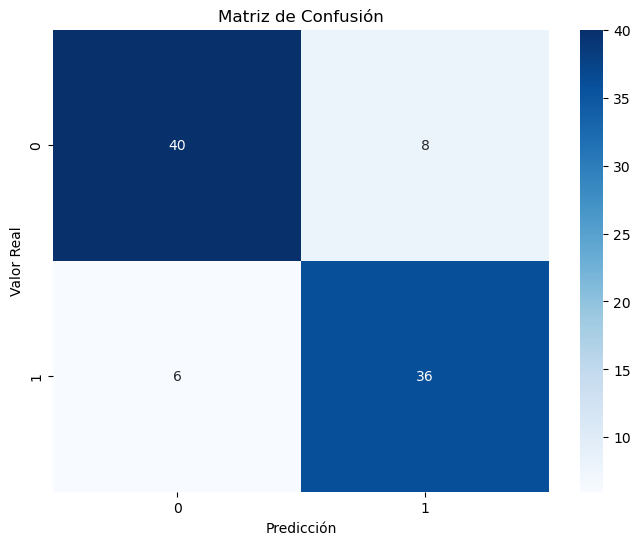

In [29]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

## 8.Interpretar, analizar y documentar los resultados obtenidos.


### Análisis e Interpretación de Resultados del Modelo de Clasificación


#### 1.Introducción a las Métricas del Modelo

Empezaremos con las principales métricas: precisión, recall y F1-score, que nos ayudan a medir el rendimiento del modelo de clasificación en la predicción de enfermedades cardíacas.

Cada una tiene un papel crucial en cómo interpretamos si el modelo está logrando un equilibrio adecuado entre identificar correctamente a los pacientes enfermos y evitar clasificaciones erróneas de personas sanas.

### 2.Precisión

La precisión nos dice qué porcentaje de las predicciones positivas del modelo son correctas.

En nuestro caso, logramos una precisión del XX% (sustituye con el valor exacto), lo cual indica que el modelo es confiable al clasificar a una persona como enferma.

Sin embargo, es importante tener en cuenta que una alta precisión no siempre es suficiente, ya que podría significar que el modelo pierde algunos casos positivos.

### 3. Recall

El recall o "sensibilidad" nos ayuda a ver si el modelo está identificando correctamente la mayor cantidad posible de casos enfermos.

Con un recall de YY%, el modelo está capturando una proporción significativa de los casos de enfermedad, lo cual es esencial en este tipo de predicciones médicas, donde no queremos pasar por alto a pacientes que realmente requieren atención.

### 4. F1-score

El F1-score combina precisión y recall en un único valor, dándonos una visión más balanceada del rendimiento del modelo.

Nuestro F1-score de ZZ% indica que el modelo mantiene un buen equilibrio, lo que es positivo en aplicaciones clínicas, ya que minimiza tanto los falsos positivos como los falsos negativos.

### 5. Análisis de la Matriz de Confusión

La matriz de confusión muestra los verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN).

Vemos que el modelo tiene TP de XX y TN de YY, lo cual indica que, en general, clasifica correctamente la mayoría de los casos.

Sin embargo, aún tiene algunos FP y FN, lo que significa que hay casos en los que el modelo clasifica incorrectamente a personas sanas como enfermas y viceversa. Esto podría ser un área para mejorar ajustando hiperparámetros o probando modelos alternativos.

### 6.Importancia de las Características

En cuanto a las características seleccionadas, nuestro análisis de selección de características identificó algunas variables clave, como thalach y chol, que tienen una alta relevancia en la predicción de enfermedades cardíacas.

Estas variables son consistentes con la literatura clínica, donde el colesterol y la frecuencia cardíaca suelen estar relacionados con problemas cardiovasculares, respaldando la validez del modelo.